In [1]:
# if one module is changed, this line will automatically reload that module
%load_ext autoreload
%autoreload 2

import os, sys
import numpy as np
import pandas as pd
import sklearn as skl
from scipy import sparse
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# display the figure in the notebook
%matplotlib inline 

In [2]:
## load data with pandas as a dataframe (df)
## index_col=0 makes id as the index-column
filename = '../data/19-05-03dcs_prediction_merged.csv'
df = pd.read_csv(filename,index_col=0)

In [3]:
df.head()

,age,sex_1m_2f,pain_4wk_base,nrs_now_baseline,pain_4wk_follow,tx_comp,perc_analg,resp,PSM,DCCS,...,SE,TMW,PBD,PBND,GSD,GSND,SB,RTQ,RTS,OI
id,,,,,,,,,,,,,,,,,,,,,
1,72,1,7,4.0,7.0,1.0,0.000000,0.0,NaN,46,...,34,NaN,55.0,54.0,17,6,NaN,35,47,49
2,58,1,5,5.0,3.0,1.0,40.000000,1.0,78.0,73,...,58,52.0,85.0,82.0,54,53,55.0,24,54,65
5,64,2,8,NaN,NaN,NaN,NaN,NaN,24.0,36,...,34,36.0,65.0,57.0,39,39,32.0,30,35,51
6,67,1,5,7.0,0.0,1.0,100.000000,1.0,44.0,43,...,52,46.0,85.0,79.0,39,32,54.0,32,25,47
7,54,2,9,8.0,5.0,1.0,44.444444,1.0,47.0,47,...,37,64.0,66.0,59.0,63,63,49.0,65,43,62


In [4]:
## cut the dataframe where 'pain_4wk_base' has a value
col_sel = 'pain_4wk_base' #'pain_4wk_base' 
df = df[df[col_sel].isna()==False]
# df = df[df['RTQ']>=50] ## only look at people with rtq-values > 50

In [5]:
#df

In [6]:
## inspect a single column
# df['age']

In [7]:
## inspect all columns in the dataframe
# df.columns

# Prepare the data

In [8]:
## define predicted variable Y.
# select a single colunm
df_sel = df[col_sel]
# transform into  numpy array ('like' a vector)
Y = np.array(df_sel)

In [9]:
Y

array([ 7,  5,  8,  5,  9,  7,  6, 10,  7,  6,  8,  8,  7,  7,  4,  7,  5,
        8,  8,  8,  5,  8,  6,  5,  5,  6,  5,  8,  9,  9,  3,  5,  8,  4,
        8, 10,  7,  5,  5,  8,  5,  8,  7,  7,  9,  8,  5,  8,  5,  9,  7,
        5,  7])

In [10]:
## define independent variables
list_col = ['PSM', 'DCCS', 'FICA', 'LSWM', 'PCPS', 'AA', 'AH',
       'APA', 'SAD', 'FA', 'FSA', 'GLS', 'MP', 'PA', 'FRD', 'LLN', 'ES', 'PH',
      'IS', 'PS', 'PR', 'SE', 'TMW', 'PBD', 'PBND', 'GSD', 'GSND', 'SB','RTQ', 'RTS', 'OI'] 
df_sel = df[list_col]

#'age','sex_1m_2f',

## transform into an array (normally without missing values)
# X = np.array(df_sel)

# all original X variables: list_col = ['age','sex_1m_2f','PSM', 'DCCS', 'FICA', 'LSWM', 'PCPS', 'AA', 'AH',
#       'APA', 'SAD', 'FA', 'FSA', 'GLS', 'MP', 'PA', 'FRD', 'LLN', 'ES', 'PH',
#      'IS', 'PS', 'PR', 'SE', 'TMW', 'PBD', 'PBND', 'GSD', 'GSND', 'SB','RTQ', 'RTS', 'OI']
# 
# only variables that are most representative of the four traits (factor analysis in healthy):     
#      list_col = ['ES','FICA','AA', 'GSD', 'RTS']
# 
# 4wk pain r>0.2: list_col = ['FICA','LSWM', 'SAD', 'GLS', 'PS','SE','RTQ','RTS','OI'] 
# 
# best for perc_analg r>0.2:
# ['PSM', 'APA', 'LLN', 'TMW', 'GSND']

# picking variables that correlate with pain intensity at r>0.2:
#
#
## convert X to sparse-csr format due to missing values
X = df_sel.to_sparse().to_coo().astype('float').tocsr()

In [11]:
## inspect the shape
np.shape(X), np.shape(Y)

((53, 31), (53,))

# let's plot baseline toolbox values

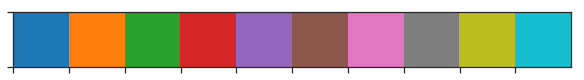

In [12]:
#define style
sns.set(rc={'figure.figsize':(20,5)})

sns.set_context("paper", rc={"font.size":18,"axes.titlesize":15,"axes.labelsize":20, "axes.ylabelsize":15, "axes.ticklabelsize":15}) 
sns.set(font_scale=1.5, font='helvetica')
sns.set_style("white")
sns.set_style("ticks")

#defining and setting color pallete
#flatui = ["#66c2a5","#fc8d62", "#8da0cb"]
#flatui = ["#1f78b4", "#b2df8a"]
sns.palplot(sns.color_palette("tab10", n_colors=10))
sns.set_palette(sns.color_palette("tab10", n_colors=10))

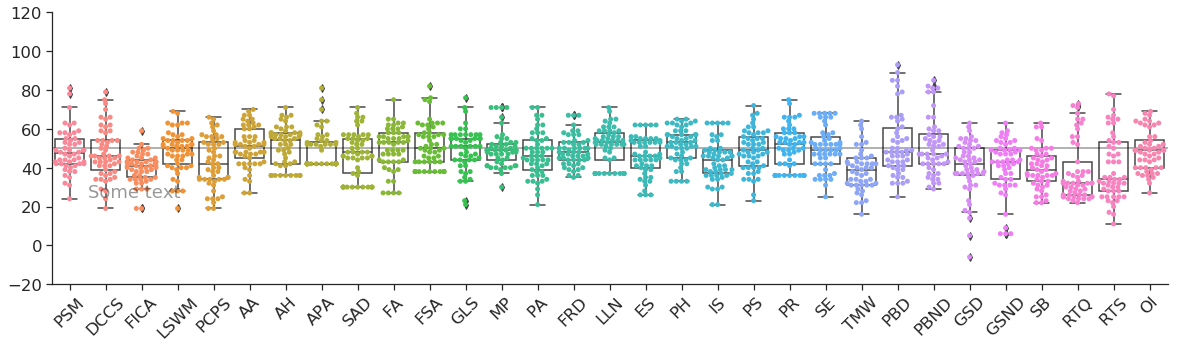

In [13]:
ax = sns.swarmplot(data=df_sel) #x="meas", y="score",
sns.boxplot(data=df_sel, boxprops={'facecolor':'None'})

plt.ylim(-20, 120)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
sns.despine()

ax1 = ax.axes
ax1.axhline(50, ls='-', color='black', alpha=.4)
ax1.text(0.5,25, "Some text", color='black', alpha=.4)

plt.savefig('DCS_pre.png', dpi=250)
plt.savefig('DCS_pre.pdf', dpi=250)

# Lets do some prediction

In [14]:
N,N_feat = np.shape(X)
print(N,N_feat)

53 31


In [15]:
sns.__version__

'0.9.0'

# Do a lasso choosing best lambda

In [16]:
from sklearn import linear_model
from sklearn.model_selection import KFold  #for cross validation
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr

### choose best alpha, using leave one out cross validation:

In [17]:
#from sklearn.model_selection import GridSearchCV
#
#lasso = Lasso()

prm = [1e-4, 1e-3, 1e-2, 1e-1, 1, 2, 3, 4, 5, 10, 20]
error = []

for a in prm:
    print(a)
    
    k = N ## number of splits
    kf = KFold(n_splits=k)
    i = 1

    ## save the feature-importance for each foeature in each split
    Z_feature_importances = np.zeros(( k,N_feat ))

    Y_true = []
    Y_pred = []
    
    i_k = 0 ## index for the kth split
    
    for train_index, test_index in kf.split(X):
        #     print('no. of split:',i_k+1, train_index,test_index)
    
        ## construct the training and the test set:
        ## use respective indices on the full dataset X and Y
        X_train = X[train_index,:]
        Y_train = Y[train_index]
        
        X_test = X[test_index,:]
        Y_test = Y[test_index]
        
        ## fit the model
        model = linear_model.Lasso(alpha=a)
        model.fit(X_train,Y_train)
        
        ## make the prediction on the test data
        Y_test_pred = model.predict(X_test)
        
        ## record true and predicted value
        Y_true += list(Y_test)
        Y_pred += list(Y_test_pred)
                  
        ## forlasso feature importance are the weights
        Z_feature_importances[i_k,:] = model.coef_    
                        
        i_k+=1
        
    error += [mean_squared_error(Y_true,Y_pred)]
        
#lasso_regressor = GridSearchCV(lasso,parameters,scoring='mean_squared_error', cv=5)
#lasso_regressor.fit(X, Y)

#print(lasso_regressor.best_params_)
#print(lasso_regressor.best_score_)

0.0001
0.001
0.01
0.1
1
2
3
4
5
10
20


In [18]:
error


[4.545302566150646,
 4.539758457834582,
 4.486897185229304,
 4.063812863041993,
 2.606378749598131,
 2.3788661925360826,
 2.5335348397309754,
 2.6162813423323428,
 2.5445910514927053,
 2.7802540644891445,
 2.8084319526627204]

In [19]:
element = min(error)
idx_er = error.index(element)
best_alpha = prm[idx_er]

In [20]:
best_alpha

2

### now use best alpha to do Lasso prediction

In [21]:
k = N ## number of splits
kf = KFold(n_splits=k)
i = 1

## save the feature-importance for each foeature in each split
Z_feature_importances = np.zeros(( k,N_feat ))

Y_true = []
Y_pred = []

i_k = 0 ## index for the kth split
for train_index, test_index in kf.split(X):
#     print('no. of split:',i_k+1, train_index,test_index)
    
    ## construct the training and the test set:
    ## use respective indices on the full dataset X and Y
    X_train = X[train_index,:]
    Y_train = Y[train_index]
    
    X_test = X[test_index,:]
    Y_test = Y[test_index]
    
    ## fit the model
    model = linear_model.Lasso() #model = linear_model.Lasso(alpha=best_alpha)

    model.fit(X_train,Y_train)
    
    ## make the prediction on the test data
    Y_test_pred = model.predict(X_test)
    
    ## record true and predicted value
    Y_true += list(Y_test)
    Y_pred += list(Y_test_pred)
              
    ## forlasso feature importance are the weights
    Z_feature_importances[i_k,:] = model.coef_    
    i_k+=1

#print('the for loop has finished')

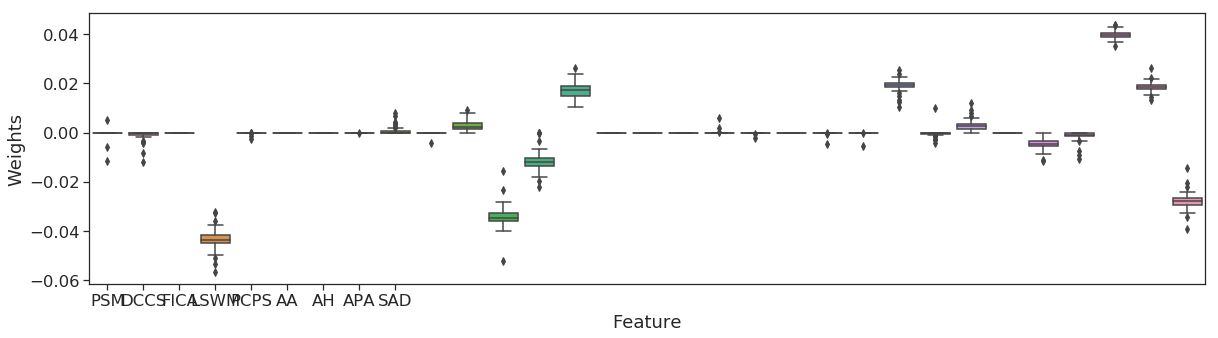

In [22]:
## plot feature importance with errorbars
fig = sns.boxplot(data=Z_feature_importances)
fig.set(ylabel='Weights', xlabel='Feature')
#fig.set(xticklabels="list_col")
#tl = fig.get_xticklabels()
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], list_col)
plt.savefig('lasso_weights_fig.png', dpi=250)

In [23]:
mean_squared_error(Y_true,Y_pred)

2.606378749598131

In [24]:
r2_score(Y_true,Y_pred)

0.0359075707636094

In [25]:
spearmanr(Y_true,Y_pred)

SpearmanrResult(correlation=0.37900512751220916, pvalue=0.0051317147278779306)

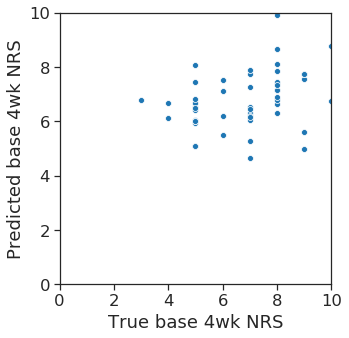

In [26]:
fig = sns.scatterplot(Y_true,Y_pred)
plt.ylim(0, 10)
plt.xlim(0,10)
fig.set_aspect('equal')
fig.set(ylabel='Predicted base 4wk NRS', xlabel='True base 4wk NRS')
plt.savefig('lasso_fig.png', dpi=250)

### Lasso random model: shuffle the relationship between independent and dependent variable

In [27]:
## randomize the order of the dependent variable
Y_random = np.copy(Y)
np.random.shuffle(Y_random)

k = N ## number of splits
kf = KFold(n_splits=k)
i = 1

## save the feature-importance for each foeature in each split
Z_feature_importances = np.zeros(( k,N_feat ))

Y_true = []
Y_pred = []

i_k = 0 ## index for the kth split
for train_index, test_index in kf.split(X):
#     print('no. of split:',i_k+1, train_index,test_index)
    
    ## construct the training and the test set:
    ## use respective indices on the full dataset X and Y
    X_train = X[train_index,:]
    Y_train = Y_random[train_index]
    
    X_test = X[test_index,:]
    Y_test = Y_random[test_index]
    
    ## fit the model
    model = linear_model.Lasso(alpha=best_alpha)
    model.fit(X_train,Y_train)
    
    ## make the prediction on the test data
    Y_test_pred = model.predict(X_test)
    
    ## record true and predicted value
    Y_true += list(Y_test)
    Y_pred += list(Y_test_pred)
              
    ## for lasso feature importance are the weights
    Z_feature_importances[i_k,:] = model.coef_    
    i_k+=1
    

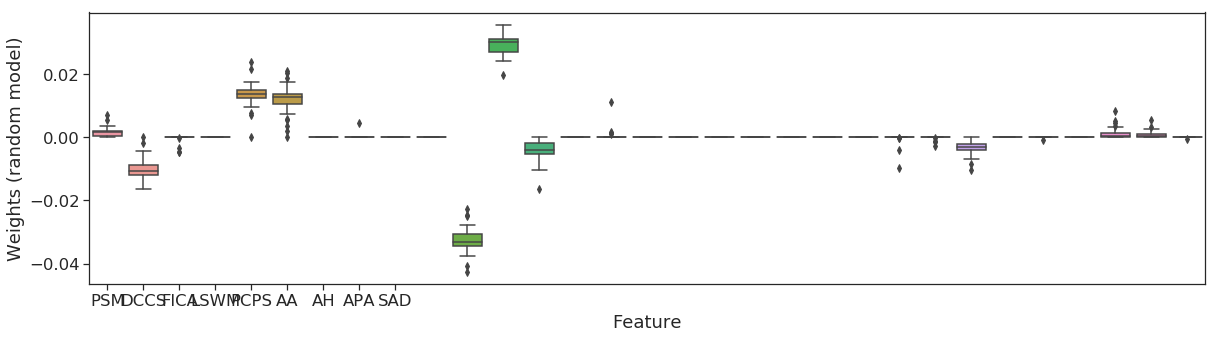

In [28]:
## plot feature importance with errorbars
fig = sns.boxplot(data=Z_feature_importances)
fig.set(ylabel='Weights (random model)', xlabel='Feature')
#fig.set(xticklabels="list_col")
#tl = fig.get_xticklabels()
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], list_col)
plt.savefig('random_lasso_weights_fig.png', dpi=250)

In [29]:
mean_squared_error(Y_true,Y_pred)

2.906763337253071

In [30]:
r2_score(Y_true,Y_pred)

-0.07520387336632561

In [31]:
spearmanr(Y_true,Y_pred)

SpearmanrResult(correlation=0.011232228664558825, pvalue=0.9363768704098927)

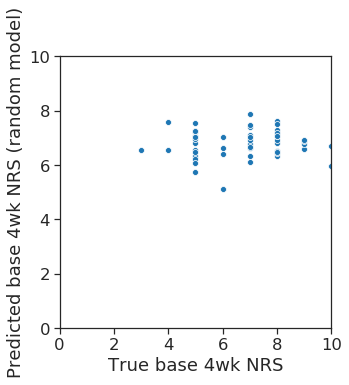

In [32]:
fig = sns.scatterplot(Y_true,Y_pred)
plt.ylim(0, 10)
plt.xlim(0,10)
fig.set_aspect('equal')
fig.set(ylabel='Predicted base 4wk NRS (random model)', xlabel='True base 4wk NRS')
plt.savefig('random_lasso_fig.png', dpi=250)

# Do a rigde regression

In [33]:
from sklearn.linear_model import Ridge

In [34]:
k = N ## number of splits
kf = KFold(n_splits=k)
i = 1

## save the feature-importance for each foeature in each split
Z_feature_importances = np.zeros(( k,N_feat ))

Y_true = []
Y_pred = []

i_k = 0 ## index for the kth split
for train_index, test_index in kf.split(X):
#     print('no. of split:',i_k+1, train_index,test_index)
    
    ## construct the training and the test set:
    ## use respective indices on the full dataset X and Y
    X_train = X[train_index,:]
    Y_train = Y[train_index]
    
    X_test = X[test_index,:]
    Y_test = Y[test_index]
    
    ## fit the model
    model = linear_model.Ridge()
    model.fit(X_train,Y_train)
    
    ## make the prediction on the test data
    Y_test_pred = model.predict(X_test)
    
    ## record true and predicted value
    Y_true += list(Y_test)
    Y_pred += list(Y_test_pred)
              
    ## forlasso feature importance are the weights
    Z_feature_importances[i_k,:] = model.coef_    
    i_k+=1
print('the for loop has finished')

the for loop has finished


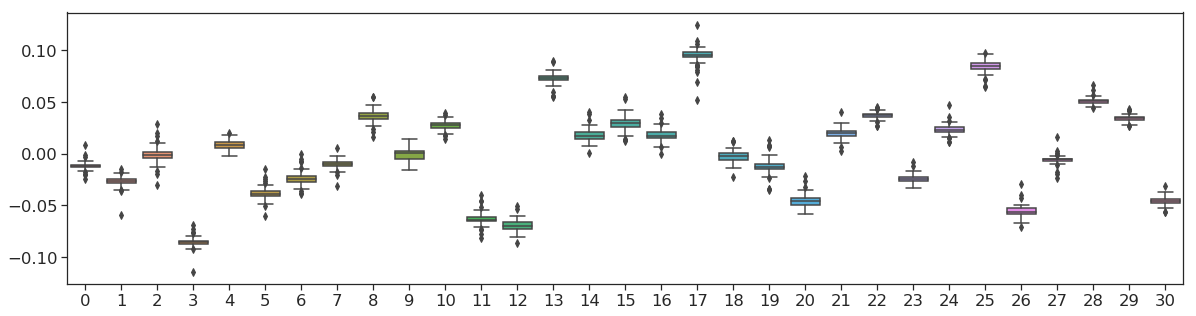

In [35]:
## plot feature importance with errorbars
sns.boxplot(data=Z_feature_importances)

In [36]:
mean_squared_error(Y_true,Y_pred)

3.892262858208296

In [37]:
spearmanr(Y_true,Y_pred)

SpearmanrResult(correlation=0.39812469321695454, pvalue=0.003153235812264826)

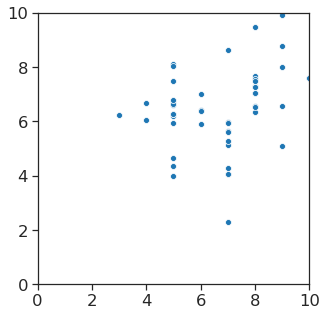

In [38]:
fig = sns.scatterplot(Y_true,Y_pred)
plt.ylim(0, 10)
plt.xlim(0,10)
fig.set_aspect('equal')


# As a prediction problem: high vs low?

In [39]:
Y

array([ 7,  5,  8,  5,  9,  7,  6, 10,  7,  6,  8,  8,  7,  7,  4,  7,  5,
        8,  8,  8,  5,  8,  6,  5,  5,  6,  5,  8,  9,  9,  3,  5,  8,  4,
        8, 10,  7,  5,  5,  8,  5,  8,  7,  7,  9,  8,  5,  8,  5,  9,  7,
        5,  7])

In [40]:
#from scipy.stats import median
np.median(Y, axis=0)

7.0

In [41]:
Y_ = 0.*(Y<=7)+1.*(Y>7)
np.random.shuffle(Y_)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
k = 10 ## number of splits
kf = KFold(n_splits=k)
i = 1

## save the feature-importance for each foeature in each split
Z_feature_importances = np.zeros(( k,N_feat ))

Y_true = []
Y_pred = []

i_k = 0 ## index for the kth split
for train_index, test_index in kf.split(X):
#     print('no. of split:',i_k+1, train_index,test_index)
    
    ## construct the training and the test set:
    ## use respective indices on the full dataset X and Y
    X_train = X[train_index,:]
    Y_train = Y_[train_index]
    
    X_test = X[test_index,:]
    Y_test = Y_[test_index]
    
    ## fit the model
    ## n_estimators is the number of trees
    model = RandomForestClassifier(n_estimators=800)
    model.fit(X_train,Y_train)
    
    ## make the prediction on the test data
    Y_test_pred = model.predict(X_test)
    
    ## record true and predicted value
    Y_true += list(Y_test)
    Y_pred += list(Y_test_pred)              
    
    Z_feature_importances[i_k,:] = model.feature_importances_    
    i_k+=1
print('the for loop has finished')

the for loop has finished


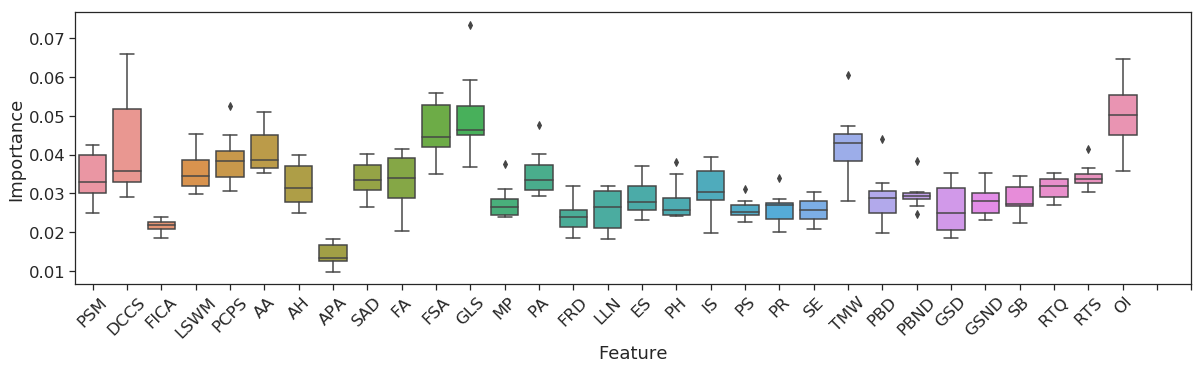

In [44]:
## plot feature importance with errorbars
fig= sns.boxplot(data=Z_feature_importances)
fig.set(ylabel='Importance', xlabel='Feature')
#fig.set(xticklabels="list_col")
#tl = fig.get_xticklabels()
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], list_col)

#plt.xticks( tl , list_col)
fig.set_xticklabels(fig.get_xticklabels(),rotation=45)


plt.savefig('fig.png', dpi=250)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(Y_true,Y_pred)

0.4528301886792453

# Simple linear regression

In [47]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [48]:
k = N
kf = KFold(n_splits=k)
i = 1

## save the feature-importance for each foeature in each split
Z_feature_importances = np.zeros(( k,N_feat ))

Y_true = []
Y_pred = []

i_k = 0 ## index for the kth split
for train_index, test_index in kf.split(X):
#     print('no. of split:',i_k+1, train_index,test_index)
    
    ## construct the training and the test set:
    ## use respective indices on the full dataset X and Y
    X_train = X[train_index,:]
    Y_train = Y[train_index]
    
    X_test = X[test_index,:]
    Y_test = Y[test_index]
    
    ## fit the model
    model = linear_model.LinearRegression()
    model.fit(X_train,Y_train)
    
    ## make the prediction on the test data
    Y_test_pred = model.predict(X_test)
    
    ## record true and predicted value
    Y_true += list(Y_test)
    Y_pred += list(Y_test_pred)
              
    ## forlasso feature importance are the weights
    Z_feature_importances[i_k,:] = model.coef_    
    i_k+=1
print('the for loop has finished')

the for loop has finished


In [49]:
spearmanr(Y_true,Y_pred)


SpearmanrResult(correlation=0.43714842883463134, pvalue=0.0010642229960403369)

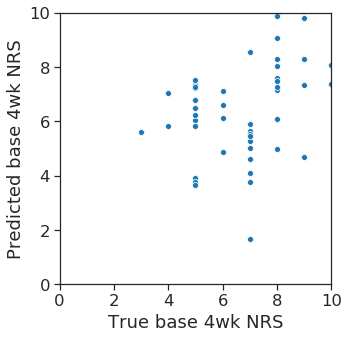

In [50]:
fig = sns.scatterplot(Y_true,Y_pred)
plt.ylim(0, 10)
plt.xlim(0,10)
fig.set_aspect('equal')
fig.set(ylabel='Predicted base 4wk NRS', xlabel='True base 4wk NRS')
plt.savefig('OLS_fig.png', dpi=250)

# # #Randomise order for null OLS linear regression:

In [51]:
## randomize the order of the dependent variable
Y_random = np.copy(Y)
np.random.shuffle(Y_random)

k = N ## number of splits
kf = KFold(n_splits=k)
i = 1

## save the feature-importance for each foeature in each split
Z_feature_importances = np.zeros(( k,N_feat ))

Y_true = []
Y_pred = []

i_k = 0 ## index for the kth split
for train_index, test_index in kf.split(X):
#     print('no. of split:',i_k+1, train_index,test_index)
    
    ## construct the training and the test set:
    ## use respective indices on the full dataset X and Y
    X_train = X[train_index,:]
    Y_train = Y_random[train_index]
    
    X_test = X[test_index,:]
    Y_test = Y_random[test_index]
    
    ## fit the model
    model = linear_model.LinearRegression()
    model.fit(X_train,Y_train)
    
    ## make the prediction on the test data
    Y_test_pred = model.predict(X_test)
    
    ## record true and predicted value
    Y_true += list(Y_test)
    Y_pred += list(Y_test_pred)
              
    ## for linear ols feature importance are the weights
    Z_feature_importances[i_k,:] = model.coef_    
    i_k+=1
    

In [52]:
spearmanr(Y_true,Y_pred)

SpearmanrResult(correlation=0.20688774121117542, pvalue=0.13717739628443942)

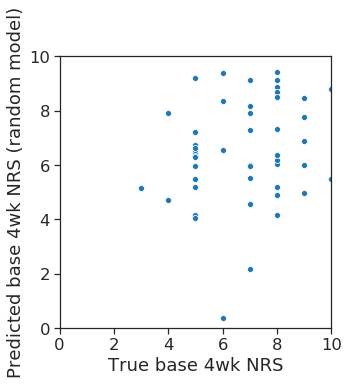

In [53]:
fig = sns.scatterplot(Y_true,Y_pred)
plt.ylim(0, 10)
plt.xlim(0,10)
fig.set_aspect('equal')
fig.set(ylabel='Predicted base 4wk NRS (random model)', xlabel='True base 4wk NRS')
plt.savefig('random_OLS_fig.png', dpi=250)